임베딩(Embedding)

  - 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
  - 워드 임베딩은 단어의 의미를 잘 표현해야한 하며, 현재까지도 많은 표현 방법이 연구
  - 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델에 투입도 가능

인코딩(Encoding)
  - 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
  - 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
  - 이러한 작업을 인코딩이라고 함
  - 텍스트 처리에서는 주로 정수 인코딩, 원 핫 인코딩을 사용

1. 정수 인코딩

   - dictionary를 이용한 정수 인코딩

In [1]:
# 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

text = "평생 살 것 처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

tokens = [x for x in text.split(' ')]
unique = set(tokens)
unique = list(unique)

token2idx = {}
for i in range(len(unique)):
    token2idx[unique[i]] = i

encode = [token2idx[x] for x in tokens]
encode

[9, 6, 0, 11, 2, 3, 7, 5, 1, 10, 8, 4]

  - keras를 이용한 정수 인코딩

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'평생': 1, '살': 2, '것': 3, '처럼': 4, '꿈을': 5, '꾸어라': 6, '그리고': 7, '내일': 8, '죽을': 9, '것처럼': 10, '오늘을': 11, '살아라': 12}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


원 핫 인코딩(One-Hot Encoding)

   - 조건문과 반복문을 이용한 원 핫 인코딩

In [3]:
import numpy as np

ohe = []
for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i] - 1):
            temp.append(1)
        else:
            temp.append(0)
    ohe.append(temp)
    
np.array(ohe)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

  - keras를 이용한 원 핫 인코딩

In [4]:
from tensorflow.keras.utils import to_categorical

ohe = to_categorical(encoded)
ohe

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

IMDB 데이터로 실습

In [5]:
# module import 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

In [20]:
# data load
num_words = 2000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print(x_train.shape, x_test.shape)

(25000,) (25000,)


In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 400

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

print(len(x_train[0]))     # 길이를 맞추기 전 x_train의 길이
print(len(pad_x_train[0])) # 길이를 맞추고 난 후 x_train의 길이

218
400


In [23]:
# 모델 구성
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(pad_x_train, y_train,
                    epochs=10, 
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 0.4822 - acc: 0.7596 - val_loss: 0.3257 - val_acc: 0.8636
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2671 - acc: 0.8903 - val_loss: 0.3209 - val_acc: 0.8590
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1973 - acc: 0.9240 - val_loss: 0.3123 - val_acc: 0.8706
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1363 - acc: 0.9581 - val_loss: 0.3350 - val_acc: 0.8702
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0894 - acc: 0.9792 - val_loss: 0.3538 - val_acc: 0.8640
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0562 - acc: 0.9916 - val_loss: 0.3807 - val_acc: 0.8640
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0348 - acc: 0.9966 - val_loss: 0.4121 - val_acc: 0.8598
Epoch 8/10
625/625 [==============================] - 3s 4ms/step - loss: 0.

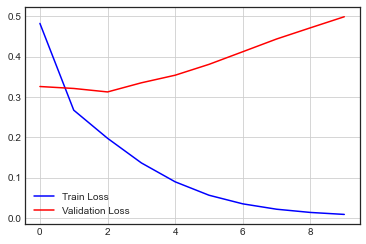

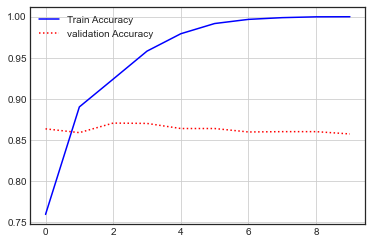

In [24]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

hist_dict = history.history
hist_dict.keys()

plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r', label="Validation Loss")
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict["acc"], 'b-', label='Train Accuracy')
plt.plot(hist_dict["val_acc"], 'r:', label="validation Accuracy")
plt.legend()
plt.grid()

plt.show()

In [19]:
# 모델 평가
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5663 - acc: 0.7972


[0.5662686824798584, 0.7971600294113159]